# Test implicitation of perte_charge_singuliere in diffusion_implicite

In [1]:
from trustutils import run

run.introduction("fauchet")
run.description("On verifie que les pertes de charge en VDF sont bien implicites en diffusion_implicite. Les calculs PCS_expl et PCR_impl divergent (K grand) et ne sont pas lances. Les calculs *10 *11 avec crank ne sont pas lances et sont à la limite de la convergence.")
run.TRUST_parameters()

## Introduction 
 Validation made by : fauchet



 Report generated 27/01/2022

### Description 
On verifie que les pertes de charge en VDF sont bien implicites en diffusion_implicite. Les calculs PCS_expl et PCR_impl divergent (K grand) et ne sont pas lances. Les calculs *10 *11 avec crank ne sont pas lances et sont à la limite de la convergence.

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/diffusion_implicite_source/build)

In [2]:
from trustutils import run  

run.reset()
c1 = run.addCase("PCS","PCS_impl.data",nbProcs=1)  
c2 = run.addCase("PCS","PCS00.data"   ,nbProcs=1)  
c3 = run.addCase("PCS","PCS01.data"   ,nbProcs=1)  
c4 = run.addCase("PCR","PCR_impl.data",nbProcs=1)  
c5 = run.addCase("PCR","PCR00.data"   ,nbProcs=1)  
c6 = run.addCase("PCR","PCR01.data"   ,nbProcs=1)
run.printCases()
run.runCases()

### Test cases 
* PCS/PCS_impl.data : 
* PCS/PCS00.data : 
* PCS/PCS01.data : 
* PCR/PCR_impl.data : 
* PCR/PCR00.data : 
* PCR/PCR01.data : 


Running **with Sserver**...
  => A total of 6 cases were (successfully) run in 2.5s.


## Perte_charge_singuliere_vdf
### Convergence of the residuals

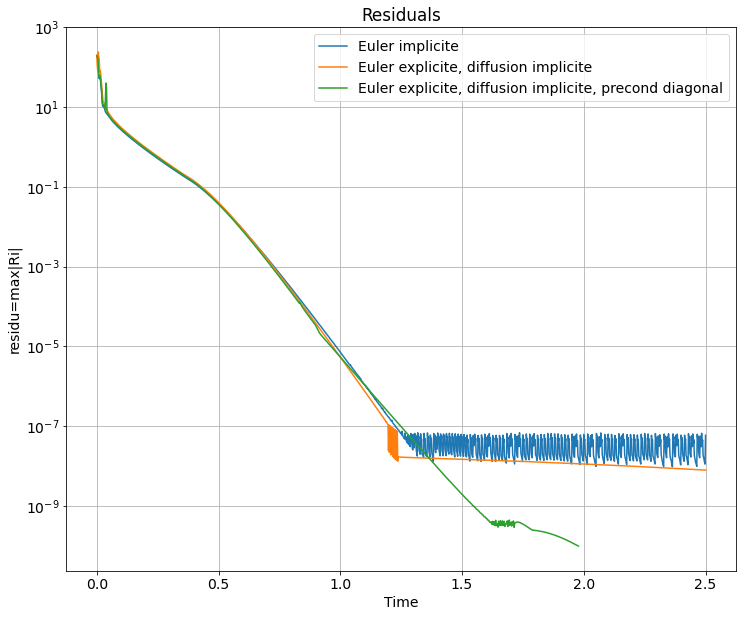

In [3]:
from trustutils import plot

a = plot.Graph("Residuals")
a.addResidu("PCS/PCS_impl.dt_ev",label="Euler implicite")
a.addResidu("PCS/PCS00.dt_ev",label="Euler explicite, diffusion implicite")
a.addResidu("PCS/PCS01.dt_ev",label="Euler explicite, diffusion implicite, precond diagonal")
a.scale(yscale='log')


Check that the results are coherent with PCS_impl

In [4]:
Tableau=plot.Table(["Error"])

# On extrait les donnees
data=plot.readFile("PCS/diff_PCS00.out")
data=data[1].split(":")[1]
Tableau.addLigne([[data]],"Euler_explicite,diffusion_implicite") 

# On extrait les donnees
data=plot.readFile("PCS/diff_PCS01.out")
data=data[1].split(":")[1]
Tableau.addLigne([[data]],"Euler_explicite,diffusion_implicite, precond_diagonal") 

Tableau.df

,Error
"Euler_explicite,diffusion_implicite",3.94841e-08
"Euler_explicite,diffusion_implicite, precond_diagonal",3.94841e-08


## Perte_charge_reguliere_vdf
### Convergence of the residuals

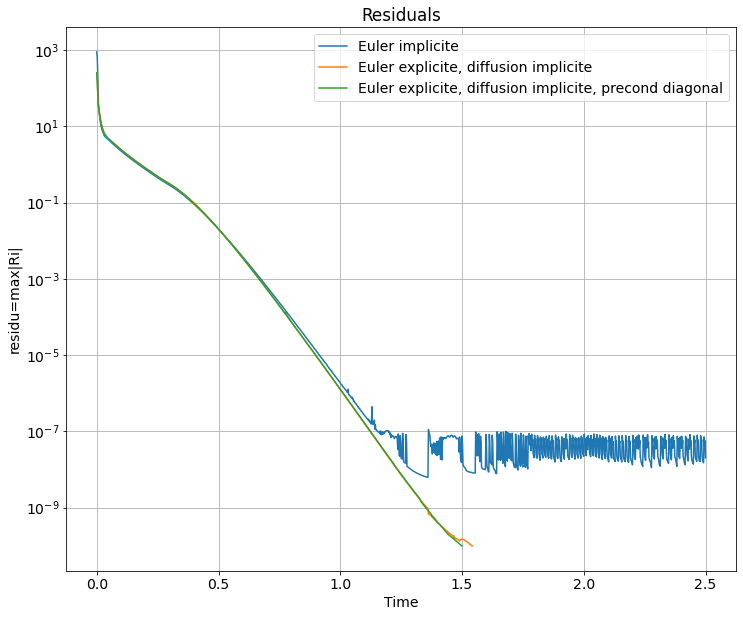

In [5]:
a = plot.Graph("Residuals")
a.addResidu("PCR/PCR_impl.dt_ev",label="Euler implicite")
a.addResidu("PCR/PCR00.dt_ev",label="Euler explicite, diffusion implicite")
a.addResidu("PCR/PCR01.dt_ev",label="Euler explicite, diffusion implicite, precond diagonal")
a.scale(yscale='log')


Check that the results are coherent with PCS_impl

In [6]:
Tableau=plot.Table(["Error"])

data=plot.readFile("PCR/diff_PCR00.out")
data=data[1].split(":")[1]
Tableau.addLigne([[data]],"Euler_explicite,diffusion_implicite") 

data=plot.readFile("PCR/diff_PCR01.out")
data=data[1].split(":")[1]
Tableau.addLigne([[data]],"Euler_explicite,diffusion_implicite, precond_diagonal") 

Tableau.df

,Error
"Euler_explicite,diffusion_implicite",5.75875e-09
"Euler_explicite,diffusion_implicite, precond_diagonal",3.25901e-08
